# Uploading [Images](https://docs.activeloop.ai/en/latest/concepts/features.html#image)

In this notebook, we will see how to upload and store images on Hub.

In [ ]:
# first we install hub
# runtime enviroment

!pip install hub

**Note**: Restart the colab runtime as few packages has been updated or you may get error (<font color="red">FileNotFoundError</font>)

Download the images

In [ ]:
!wget -q https://github.com/albumentations-team/albumentations_examples/archive/master.zip -O /tmp/albumentations_examples.zip
!unzip -o -qq /tmp/albumentations_examples.zip -d /tmp/albumentations_examples
!cp -r /tmp/albumentations_examples/albumentations_examples-master/notebooks/images .
!echo "Images are successfully downloaded"

Images are successfully downloaded


In [ ]:
from hub.schema import ClassLabel, Image
from hub import transform, schema

from skimage.io import imread
from skimage import img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from glob import glob
from time import time

%matplotlib inline

In [ ]:
# a list of image filepaths
fnames = ["images/image_1.jpg", "images/image_2.jpg", "images/image_3.jpg"]
len(fnames)

3

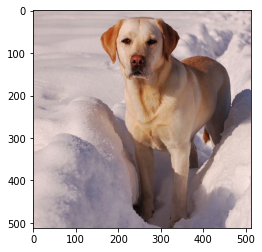

In [ ]:
# each image filepath corresponds to an unique image
img = imread(fnames[2])
plt.imshow(img)

## Defining a Schema
A schema is a python `dicts` that contains metadata about our dataset. 

In this example, we tell Hub that our images have the shape (512, 512, 3) and are `uint8`. Furthermore, these images belong to one of three classes.

In [ ]:
my_schema = {
    "image": Image(shape=(512, 512, 3), dtype="uint8"),
    "label": ClassLabel(num_classes=3),
}

## Defining Transforms
First, we define a method `load_transform` and decorate it with `@transform`. This is the function that will applied to **each instance/sample** of our dataset. 

In our example, for each element in the list `fnames`, we want to read the image into memory (with `imread`) and label it (by pulling its class from its filename). If we wanted to, we include arbitrary operations too, perhaps resizing or reshaping each image.

Then, we return a `dict` with the same key-values as the ones defined in `my_schema`.

In [ ]:
@transform(schema=my_schema)
def load_transform(sample):
    image = imread(sample)
    label = int(sample[-5]) - 1
    
    return {
        "image" : image,
        "label" : label
    }

In [ ]:
ds = load_transform(fnames) # returns a transform object
type(ds)

## Finally, Execution!
Hub lazily executes, so nothing happens until we invoke `store`.

In [ ]:
start = time()

tag = "./my_datasets/tutorial_image"
ds2 = ds.store(tag)
type(ds2)

end = time()
print("Elapsed time:", end - start)

In [ ]:
plt.imshow(ds2['image', 0].compute())